<a href="https://colab.research.google.com/github/ejramirez133/ejramirez133.github.io/blob/main/Gastropod_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 4 THESIS:
Ramirez, E.S.,
Tejol, M.J.O.,
Huerta, D.C.B.,
Mahinay, C.O.

**Gastropod dataset**

YOLOv8 Instance Segmentation

### Prepare GPU

In [ ]:
!nvidia-smi

Mon Oct 23 05:00:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

### Preparing Gastropod dataset from Roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yCBUHzaj0y67ElqCccEj")
project = rf.workspace("thesis-gj0ap").project("thesis-xpsdi")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Suc

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Thesis-1 in yolov8:: 100%|██████████| 1896/1896 [00:00<00:00, 8697.20it/s]


## Training the Gastropod dataset with 100 Epochs and yolov8m-seg

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 52.4M/52.4M [00:00<00:00, 68.3MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Thesis-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

## Results

In [ ]:
!ls {HOME}/runs/segment/train2/

args.yaml					    MaskPR_curve.png	 train_batch3782.jpg
BoxF1_curve.png					    MaskR_curve.png	 val_batch0_labels.jpg
BoxP_curve.png					    results.csv		 val_batch0_pred.jpg
BoxPR_curve.png					    results.png		 val_batch1_labels.jpg
BoxR_curve.png					    train_batch0.jpg	 val_batch1_pred.jpg
confusion_matrix.png				    train_batch1.jpg	 val_batch2_labels.jpg
events.out.tfevents.1698037949.b2ee12451fec.3397.0  train_batch2.jpg	 val_batch2_pred.jpg
MaskF1_curve.png				    train_batch3780.jpg  weights
MaskP_curve.png					    train_batch3781.jpg


/content


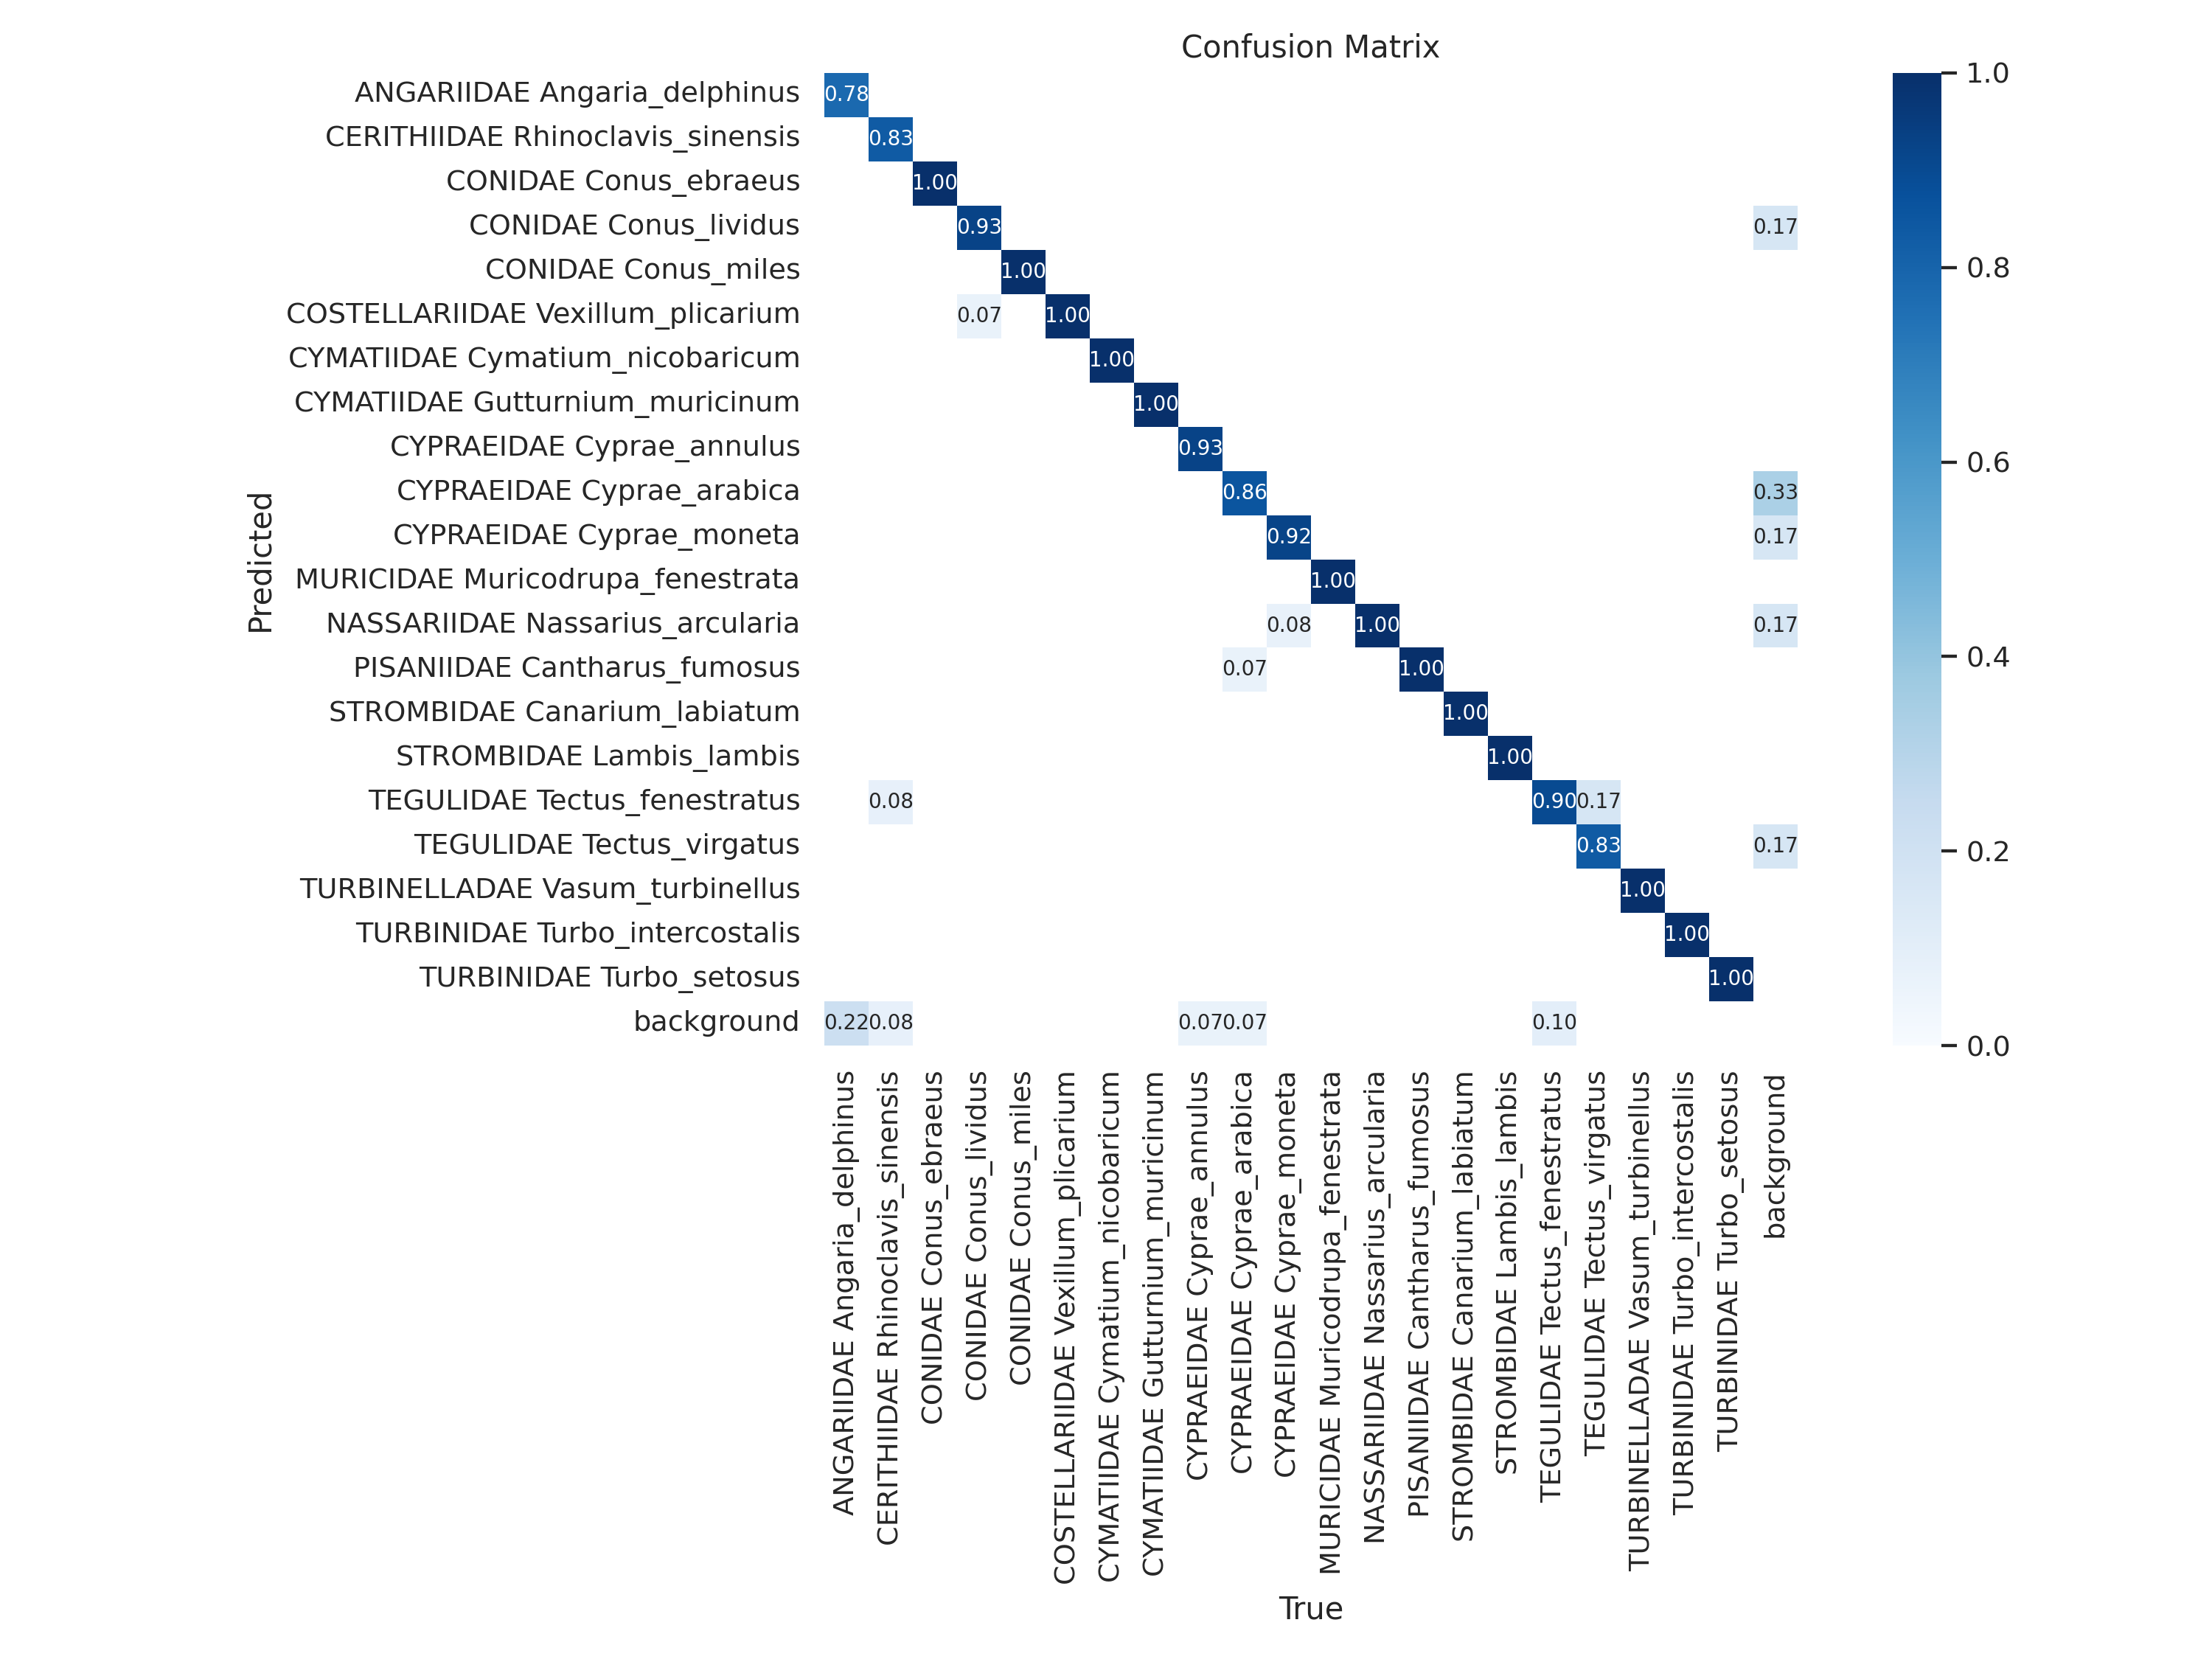

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

/content


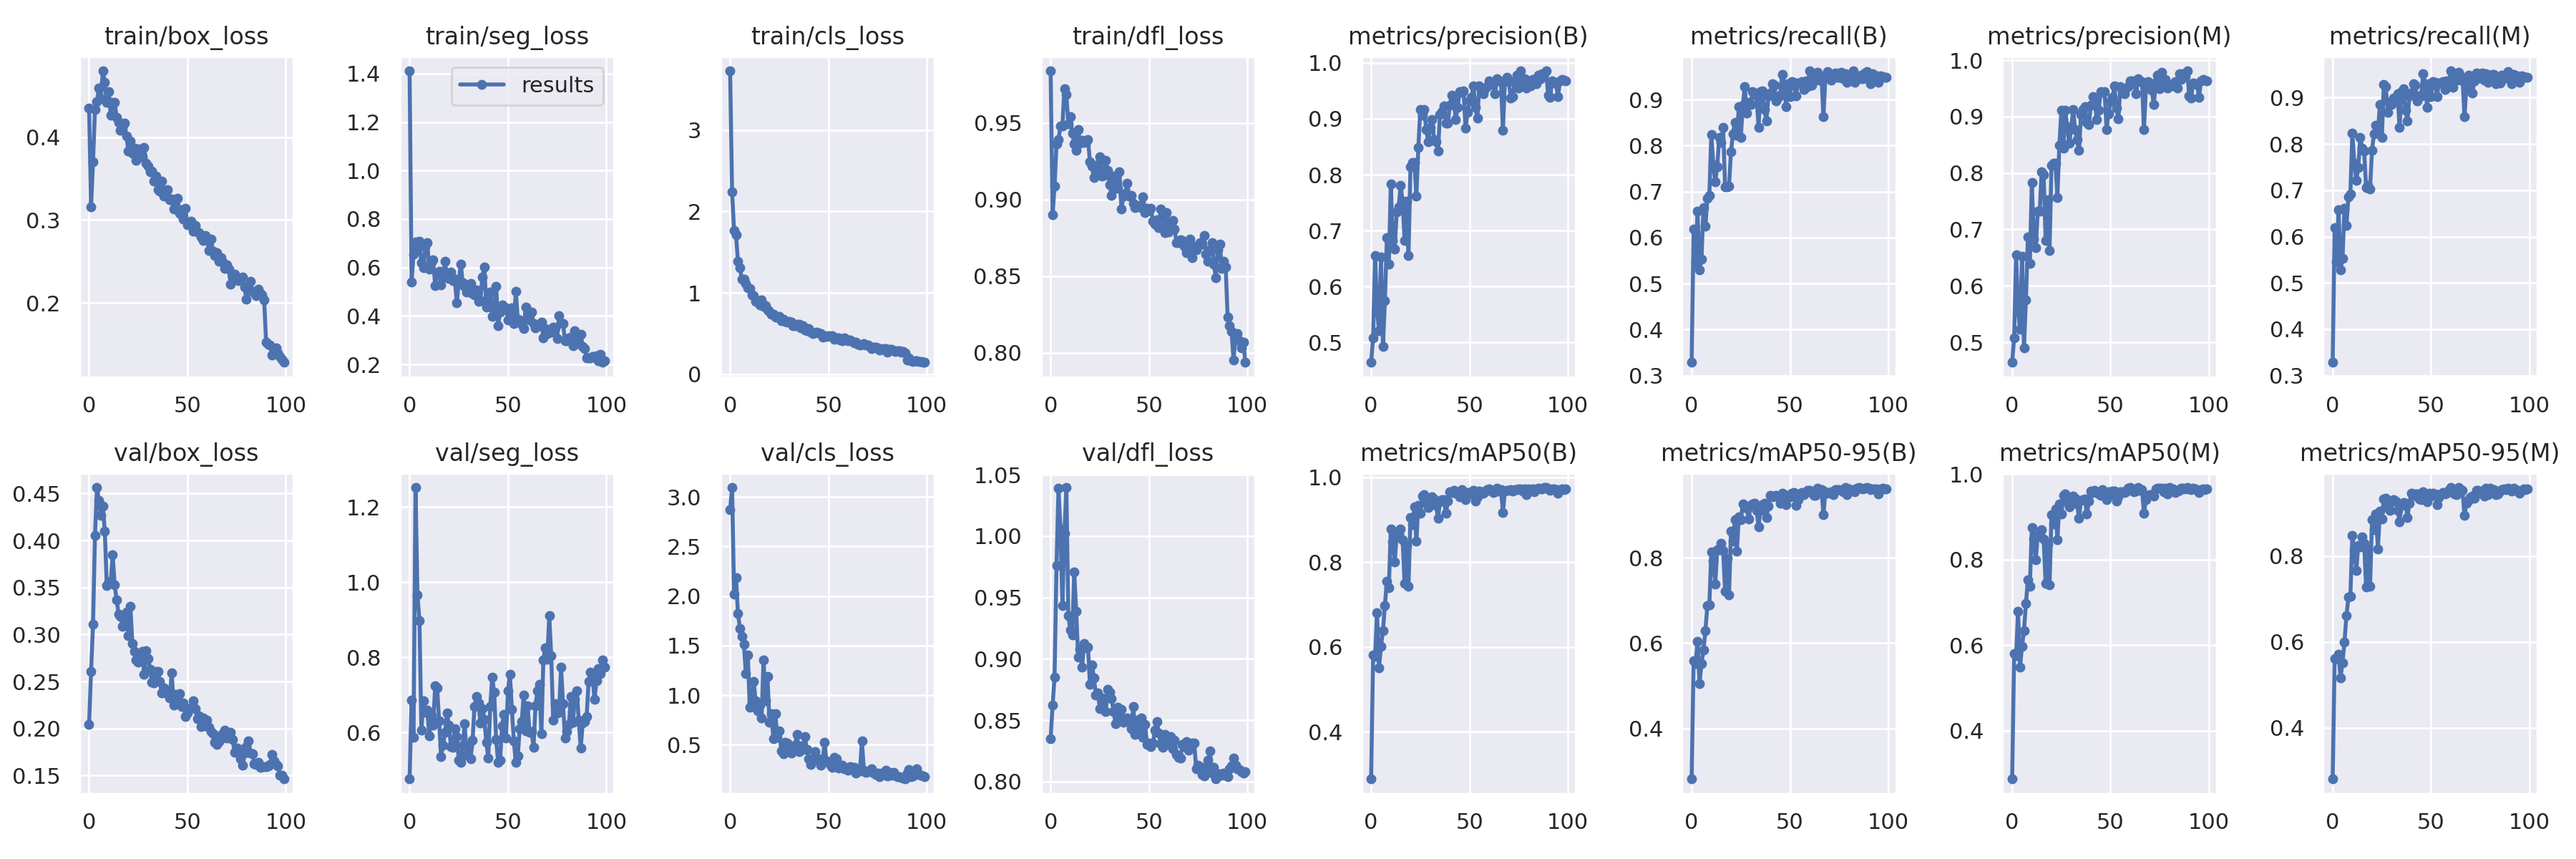

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

/content


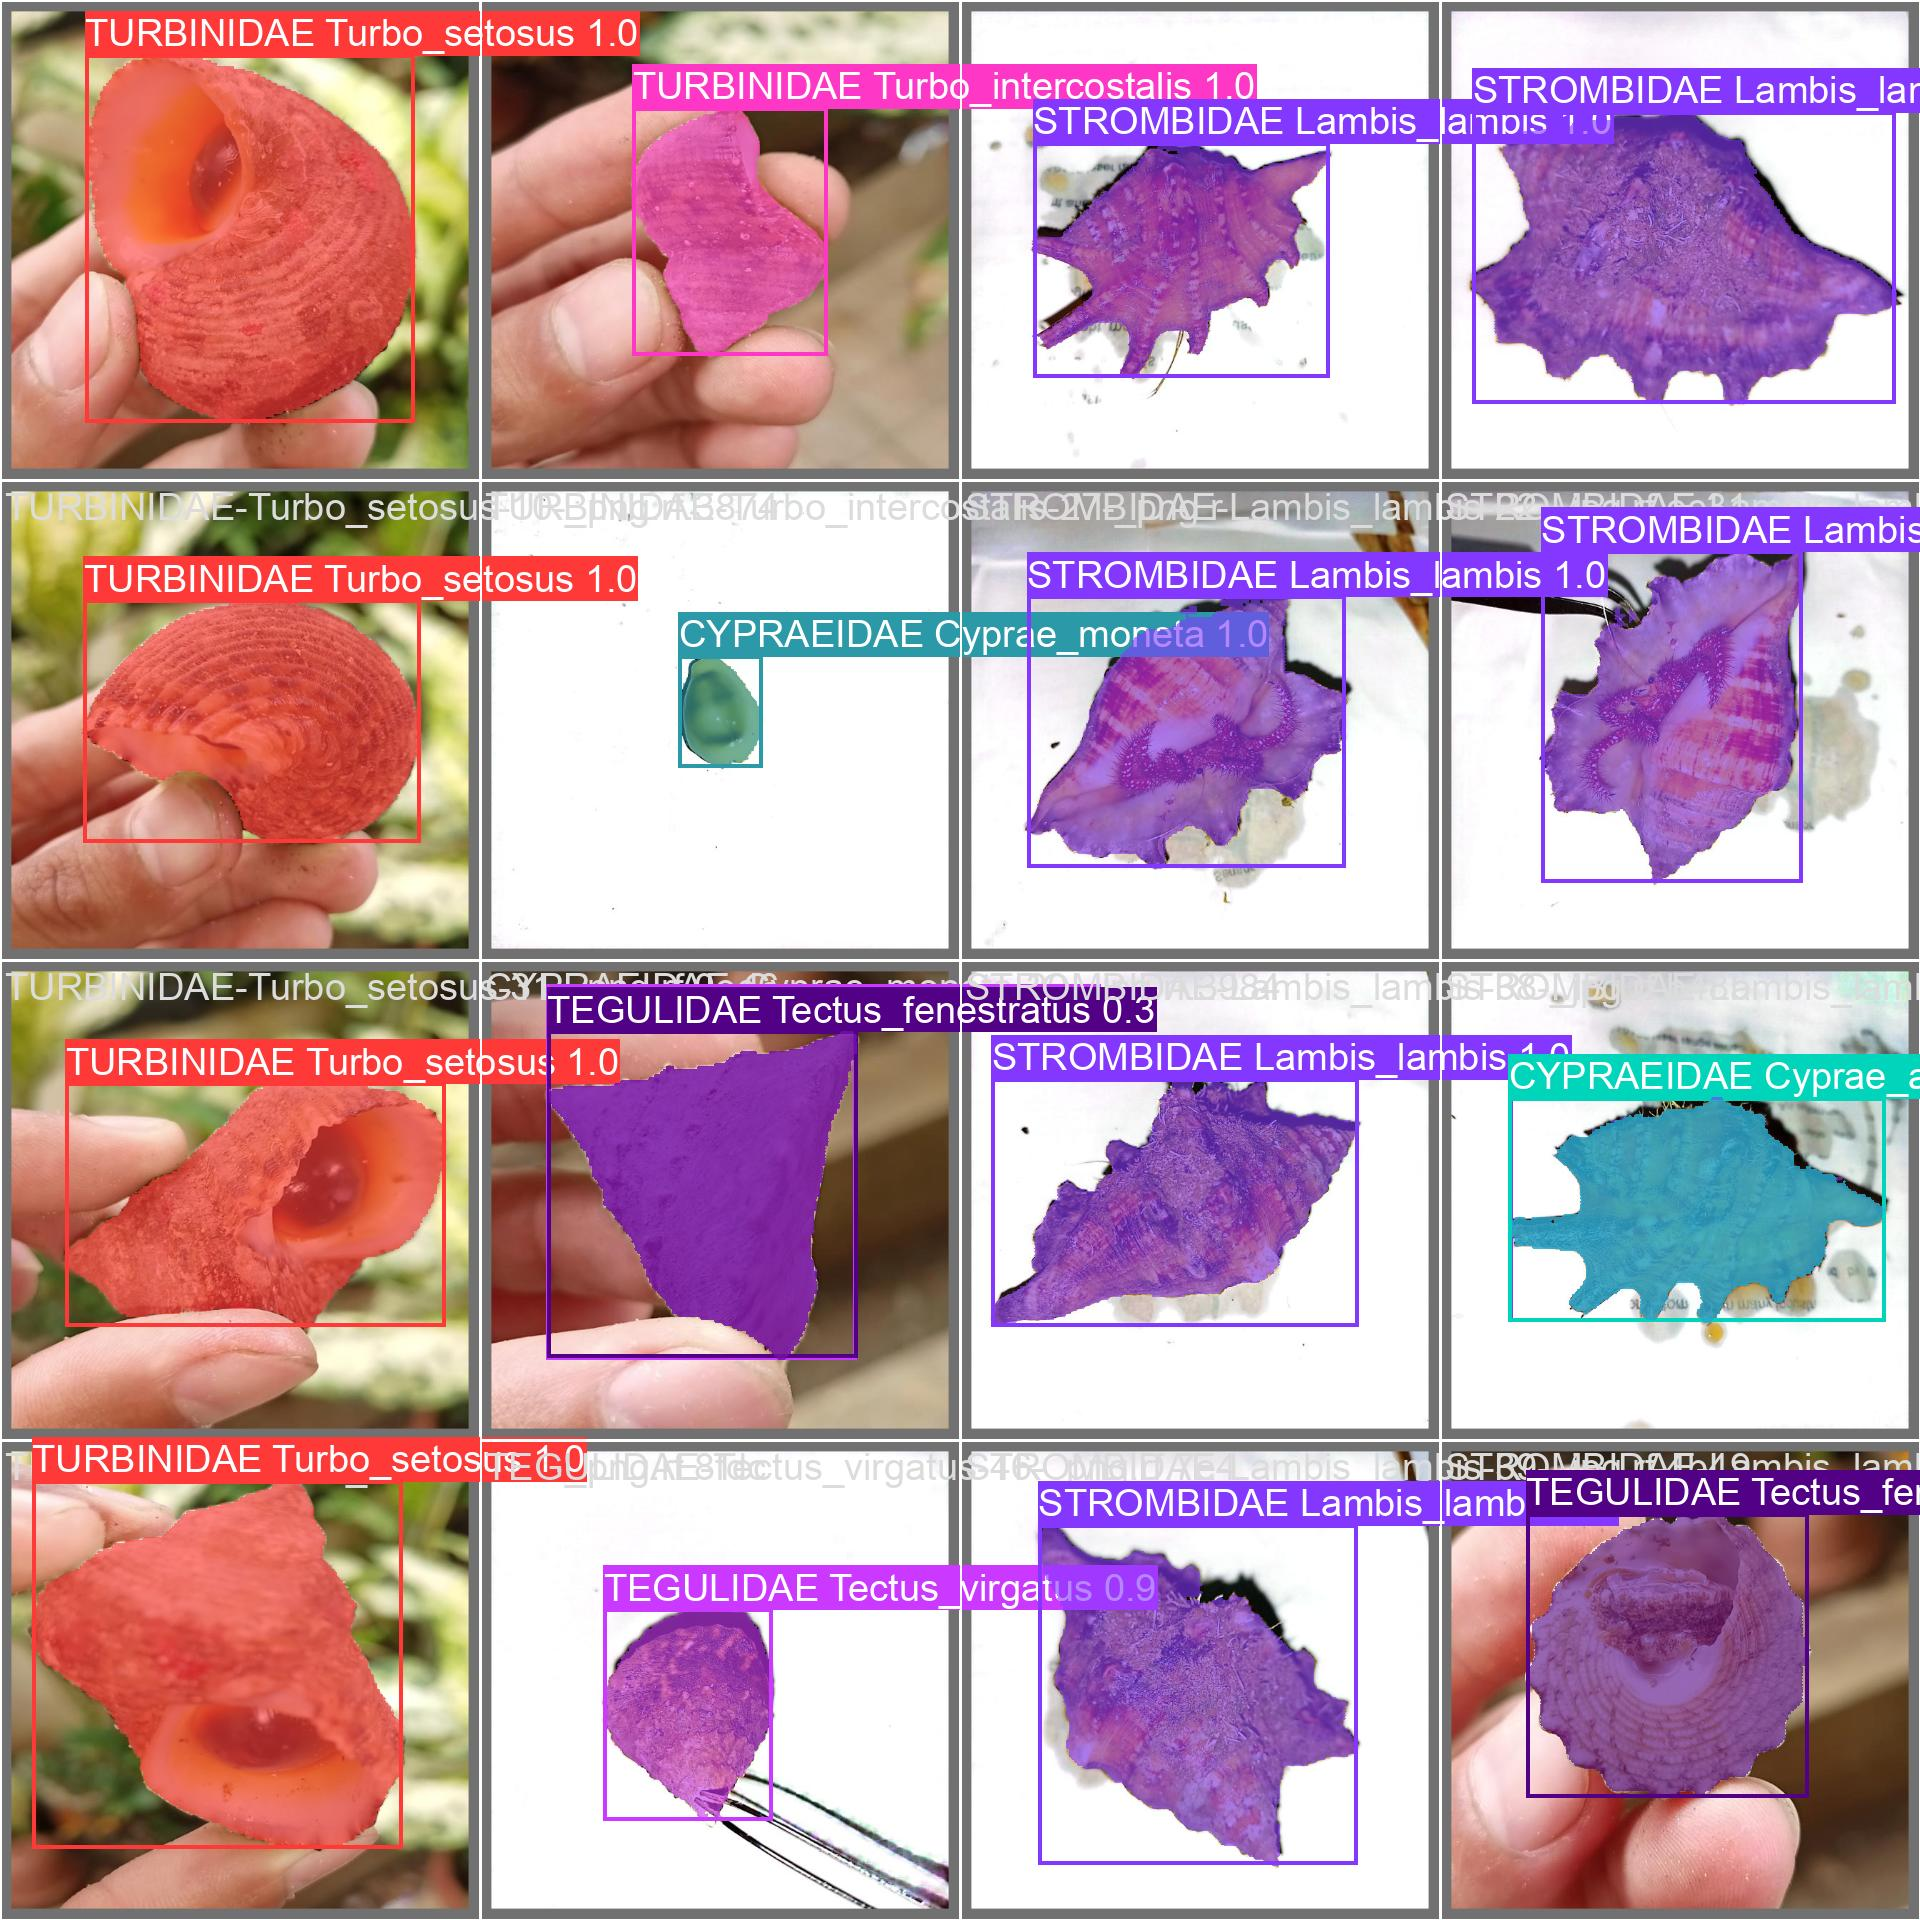

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch2_pred.jpg', width=600)

### Validate Gastropod Detection & Classification Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-23 06:25:50.762285: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 06:25:51.804904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27234543 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/Thesis-1/valid/labels.cache... 189 images, 0 backgrounds, 0 corrupt: 100% 189/189 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/Thesis-1/valid/images/TEGULIDAE-Tectus_fenestratus-18-_png.rf.25d24b883ec545d710b0421187fd3975.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m

## Inference with Gastropod Detection & Classification Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-10-23 06:27:20.445124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 06:27:21.498868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27234543 parameters, 0 gradients, 110.0 GFLOPs

image 1/93 /content/datasets/Thesis-1/test/images/ANGARIIDAE-Angaria_delphinus-30-_png.rf.5beab5af11a02a14f2e468a6dfd32aa5.jpg: 640x640 1 ANGARIIDAE Angaria_delphinus, 45.6ms
image 2/93 /content/datasets/Thesis-1/test/images/ANGARIIDAE-Angaria_delphinus-37-_png.rf.29a8f6974b20f5a0925f4fcf9da8998f.jpg: 640x640 1 ANGARIIDAE Angaria_delphinus, 45.8ms
image 3/93 /content/d

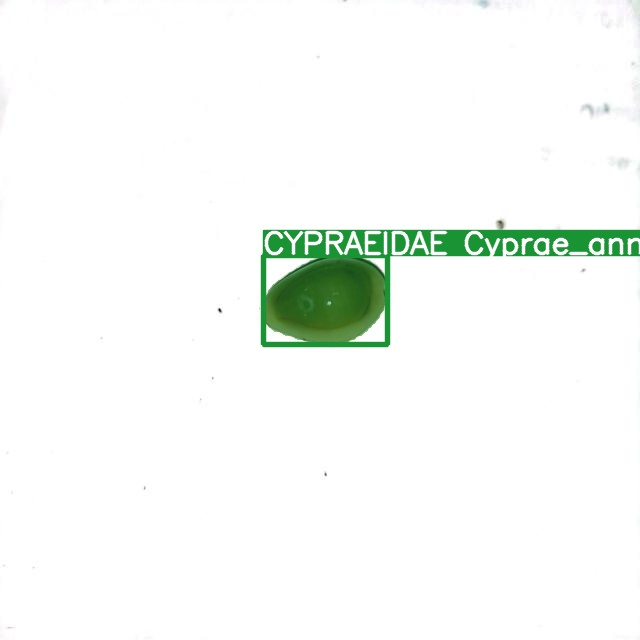

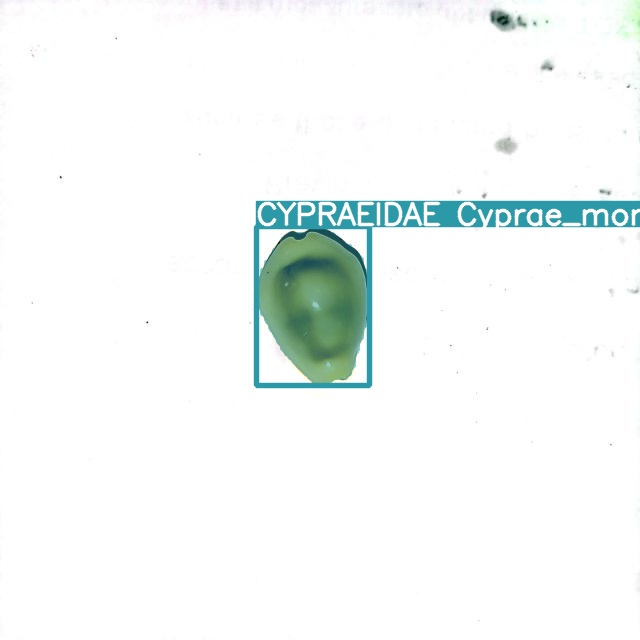

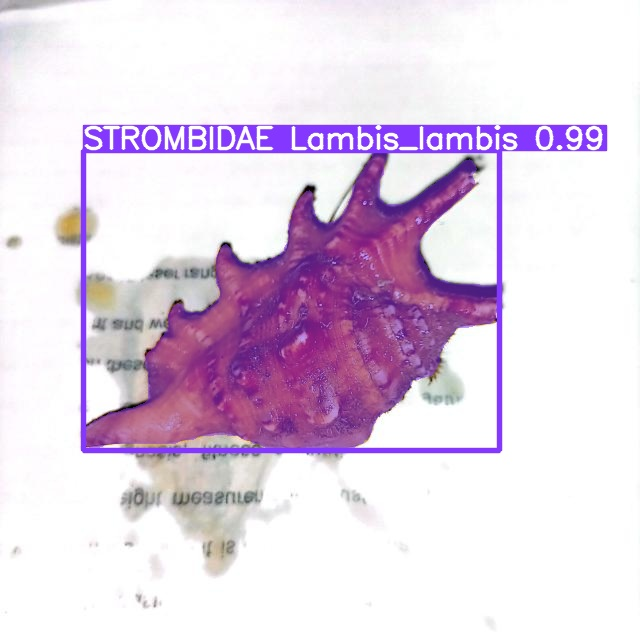

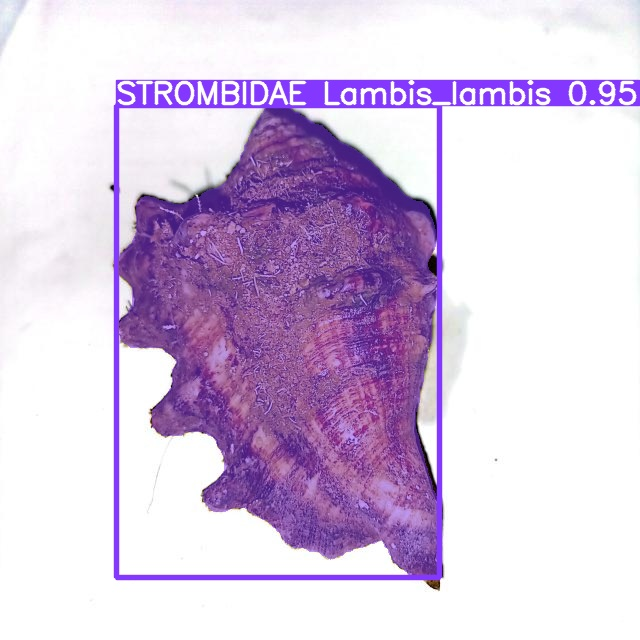

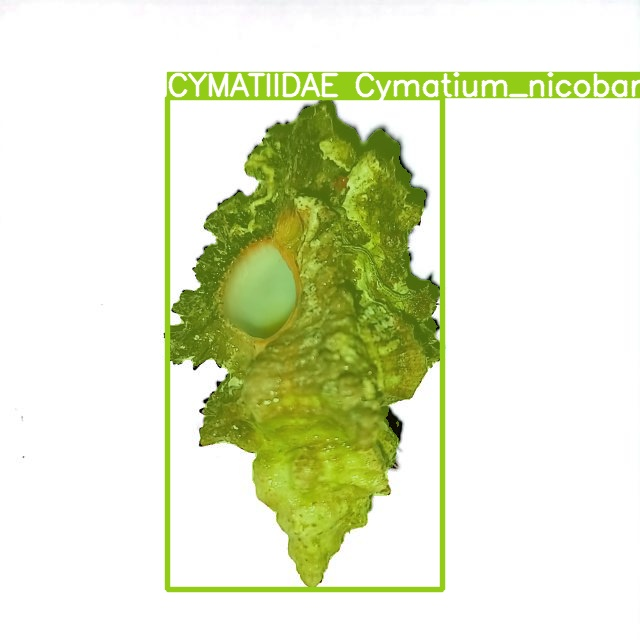

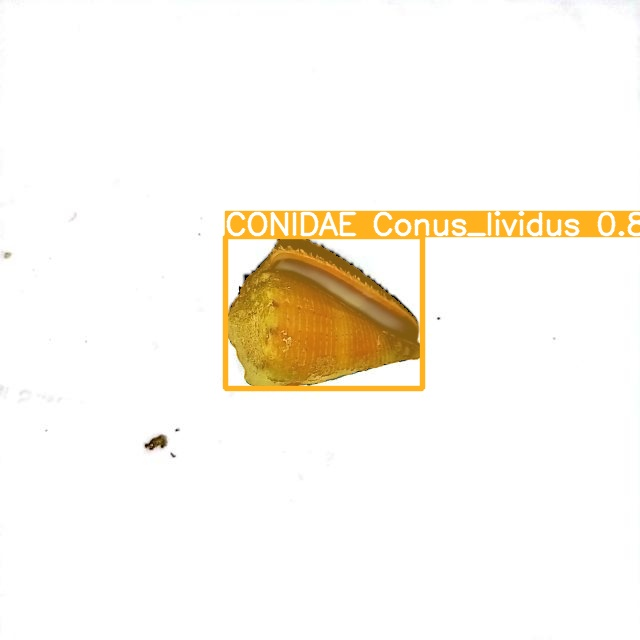

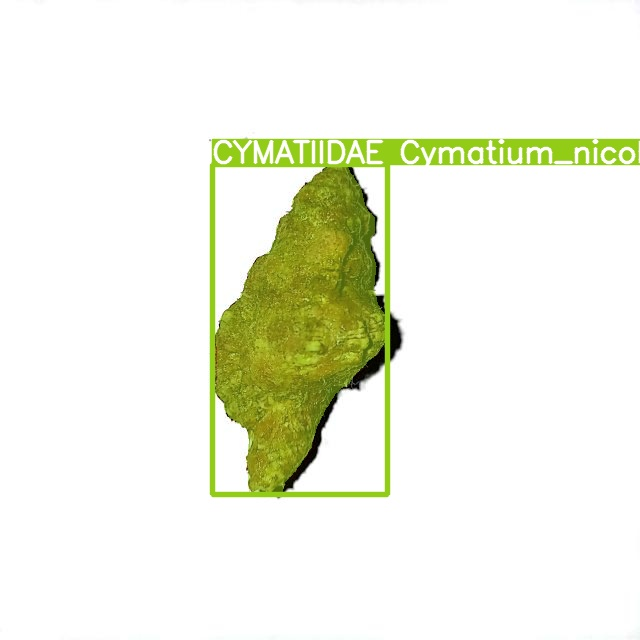

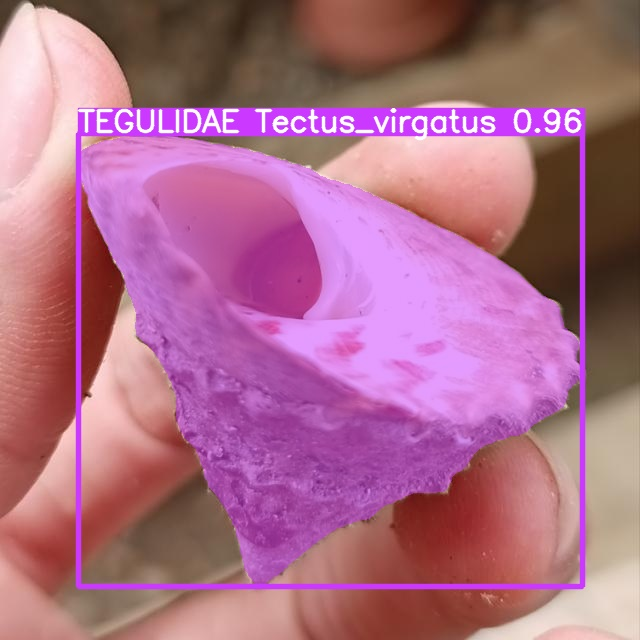

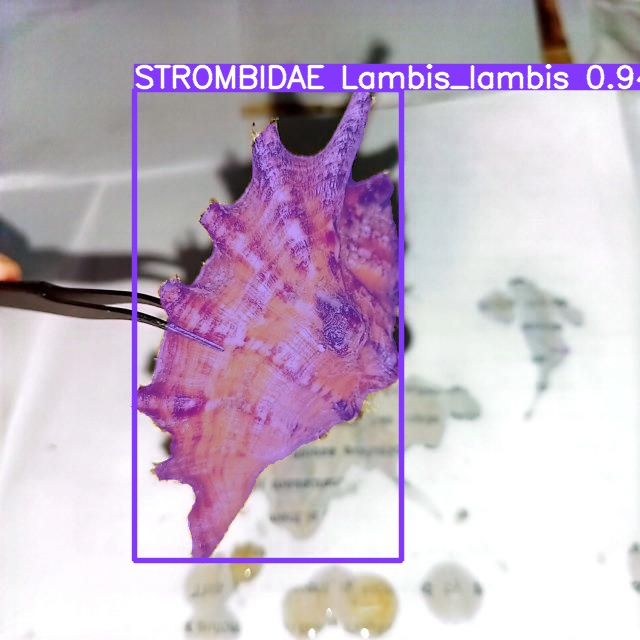

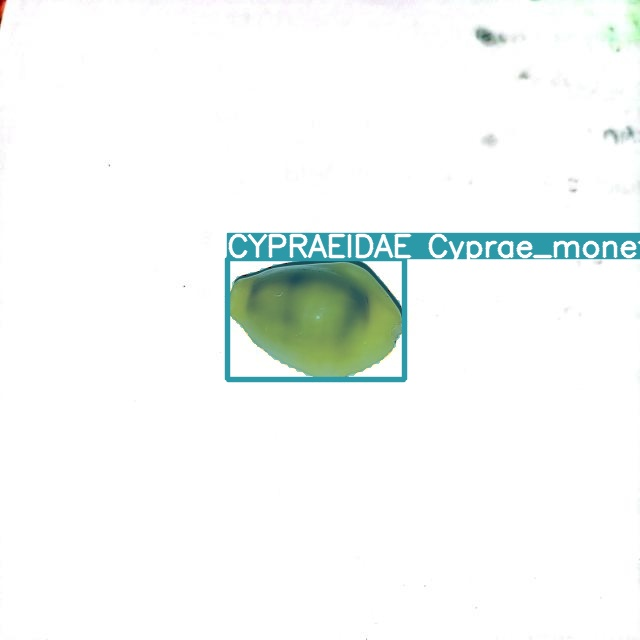

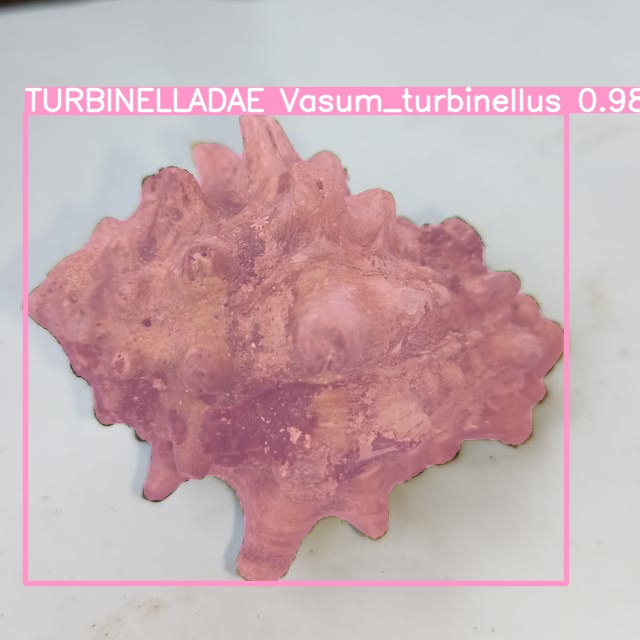

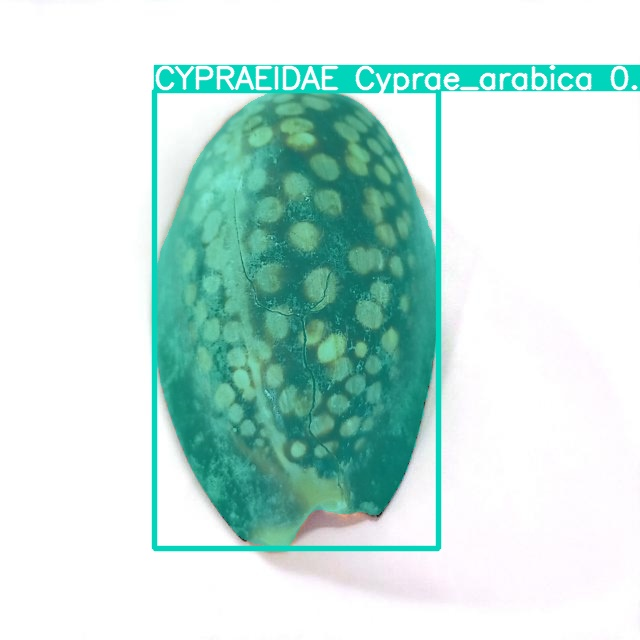

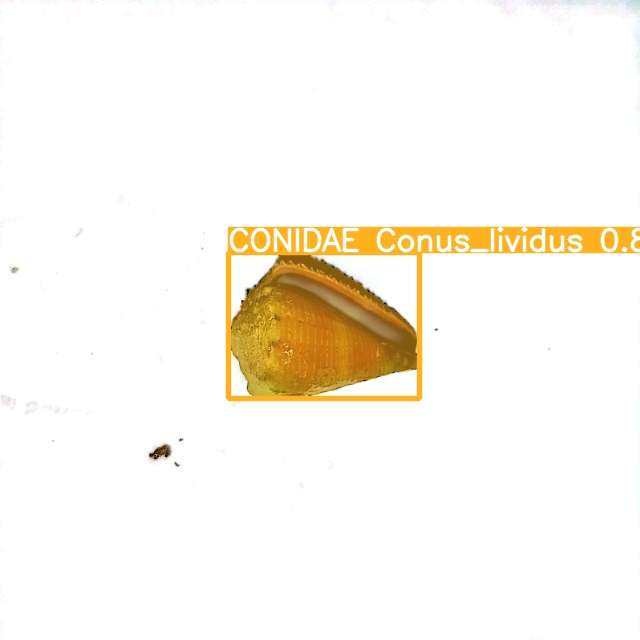

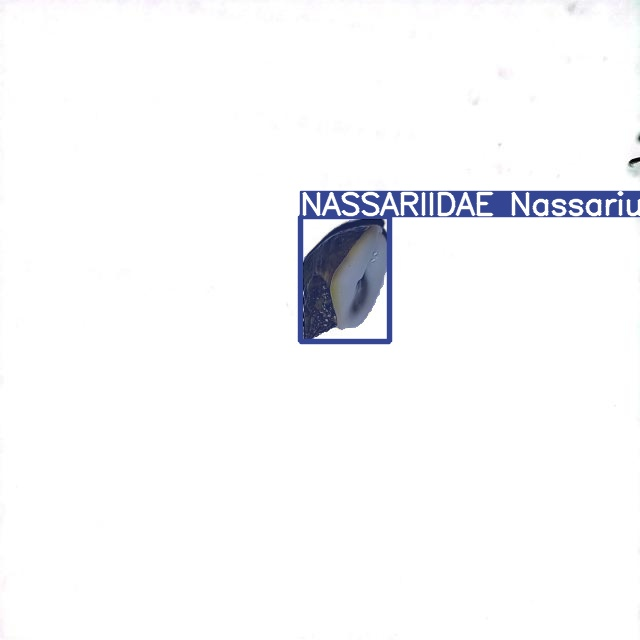

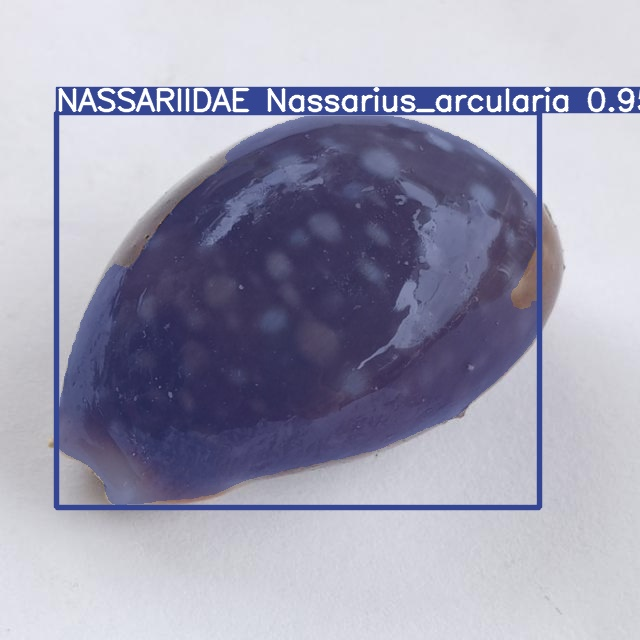

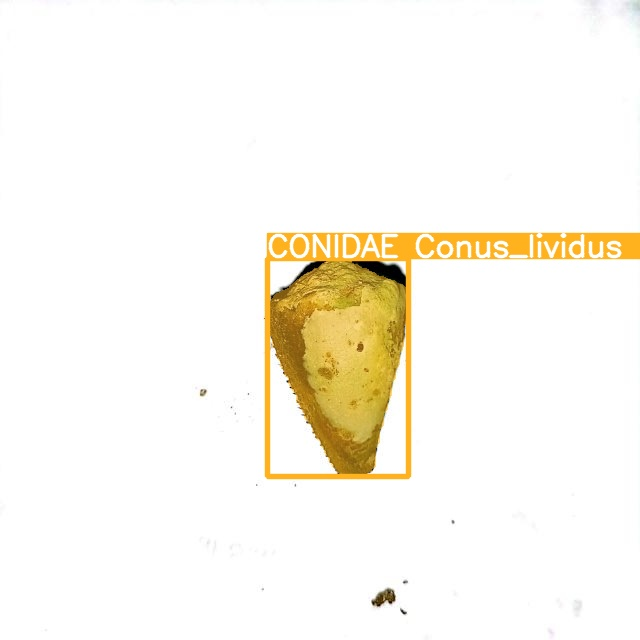

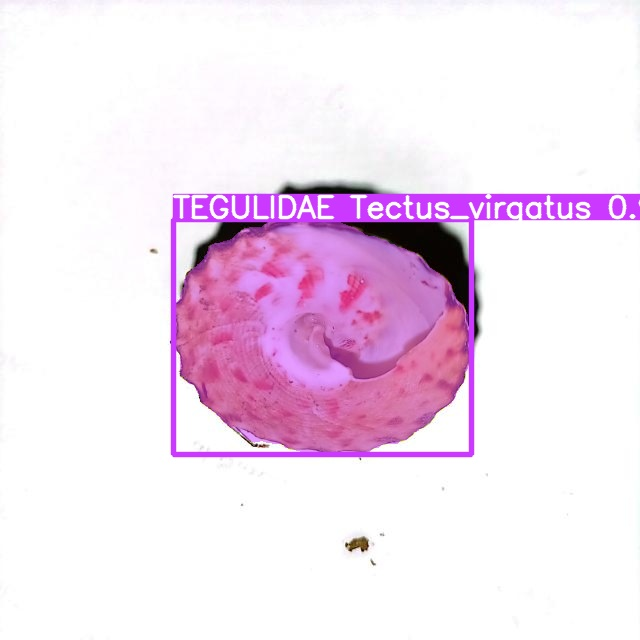

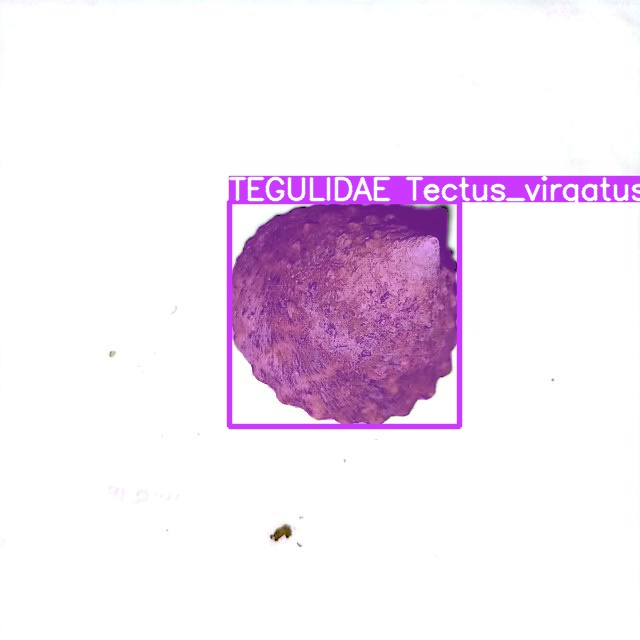

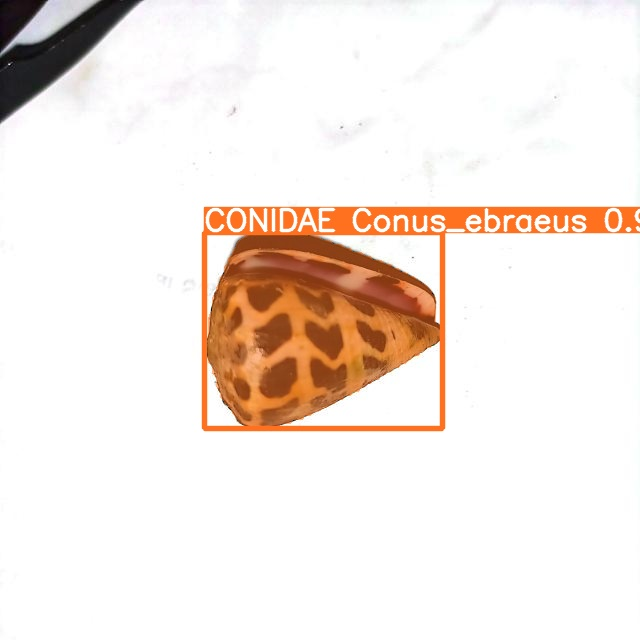

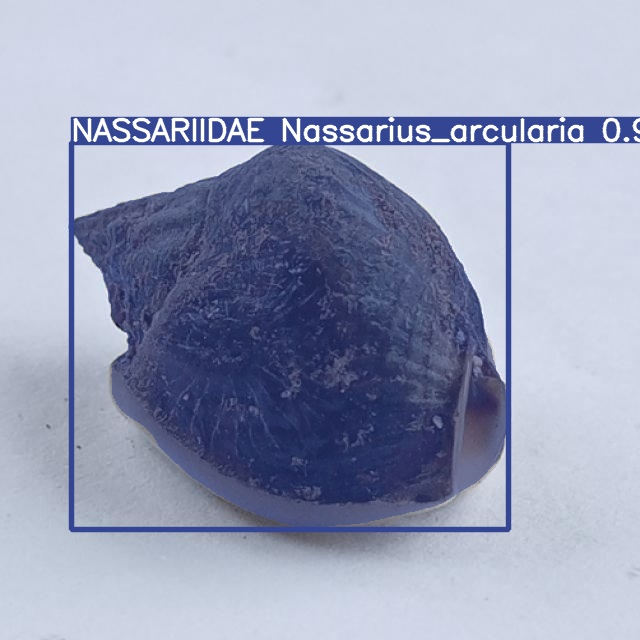

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")

## Save & Deploy Model

In [ ]:
#project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train2/")